# Applied Deep Learning Tutorial 
contact: Mark.schutera@kit.edu
# Deep Learning Foundations

## Introduction
In this tutorial, you will attempt to get a first understanding of neural networks and the tensorflow library. You will get an understanding of backpropagation, convolutional layers, fully connected layers, activation functions, loss functions, and bring all this together into your first neural network architecture.

<img src="graphics/set_sails.jpg" width="700"><br>
<center> Fig. 1: Setting sails for the deep learning journey. Image from [pixabay](https://pixabay.com/de/photos/) </center>



## Back Propagation

Backpropagation is the central part of iterative optimization. The backpropagation utilizes the derivative of each unit in the neural network starting with the determined error resulting from the loss function. With the chain rule the various units are connected to obtain the derivatives of the loss function through all layers. The resulting matrix shows you how each weight effects the output and its error. Thus, aiming to minimize the error the derivatives tell you in which direction to update the associated weights.


Define an input vector x with two entries valued (0.2 and 0.4) and a fully connected weight matrix W with two units. The groundtruth should be defined as 1.

\begin{align}
	x =\begin{bmatrix}
	0.2 \\ 0.4 
	\end{bmatrix}
\end{align}	

\begin{align}
	y = 1
\end{align}	

In [1]:
# We will first do some experiments in numpy, no worries there will be enough tensorflow soon.
import numpy as np

x = np.array([[0.2], [2]])
W = np.array([[-0.3, 0.8]])
y = 1


Next we need to define our architecture to reach the prediction of our one unit neural network, we split the equation in two functions so we can define the derivates partially in the next step:

\begin{align}
	 f(x,W)= || W*x ||^2.
\end{align}

In [2]:
def multiplication(W,x):
    q = np.dot(W,x)
    return q

def prediction(q):
    f_1 = np.square(q)
    y_pred = np.sum(f_1)
   
    return y_pred

To calculate the error we need to specify a loss function or objective function and our weight update step:

In [3]:
def update (W, grad_W, learning_rate):
    W = W - np.multiply(learning_rate , grad_W)
    return W

In [4]:
def prediction_loss(y_pred, y):
    error = y_pred - y
    loss = np.square(error)
    return loss

Now it is time to determine the partial derivatives of our neural network. We aim to determine the gradient of our function 
$f(x,W)$ dependent from the input values of our network $x$, and the networks parameters $W$.

\begin{align}
	\frac{\partial f(x,W)}{\partial W}
\end{align}

\begin{align}
    \frac{\partial f(x,W)}{\partial x}
\end{align}

By using the chain rule we can easily propagate the error through the local derivatives at each operation and unit.

The derivative of the last stage of our unit can be written as: 
\begin{align}
	f(q)= ||q||^2 = q_{1}^2+...+q_{n}^2, \frac{\partial f(q)}{\partial q} = 2*q_{i}.
\end{align}

For the next node we have two variable inputs and so we have to calculate the local derivatives with respect to both $W$, since this is where we can adjust the weights.
\begin{align}
	q = W*x	
\end{align}

\begin{align}
    \frac{\partial q_{k}}{\partial W_{i,j}}=x
\end{align}

With the chain rule, we can now backpropagate the error to those weights:

\begin{align}
    \frac{\partial f(x,W)}{\partial W} = \frac{\partial f(q)}{\partial q} * \frac{\partial q}{\partial W} = 2*q*x^{T}
\end{align}



In [5]:
# Starting with the loss function
def gradient_loss(y_pred, y):
    grad_loss = 2 * (y_pred-y)
    return grad_loss

# Over the square operator
def gradient_prediction (q, grad_loss):
    grad_q = 2 * q * grad_loss
    return grad_q

# Finally to the multiplication of our inputs
def gradient_multiplication (x, grad_q):
    if len(x) == 1:
        grad_W = grad_q * x.T
    else:
        grad_W = np.dot(grad_q, x.T)
    return grad_W

Finally we bring everything together in our iterative weight update process, in our optimization routine for our neural network.

In [6]:
learning_rate = 1e-2

weightlist1 = []
weightlist2 = []
predictionlist = []
groundtruthlist = []

for t in range(10):
    
    weightlist1.append(W[0][0])
    weightlist2.append(W[0][1])
    
    # Forward pass
    q = multiplication(W,x)
    y_pred = prediction(q)
    loss = prediction_loss(y_pred, y)
    print("Training loss: ", loss)
    
    # Backpropagation
    grad_loss = gradient_loss(y_pred, y)
    grad_q = gradient_prediction (q, grad_loss)
    grad_W = gradient_multiplication (x, grad_q)
    W = update (W, grad_W, learning_rate)
    predictionlist.append(y_pred)
    groundtruthlist.append(y)
    print("Current prediction: ", y_pred)

Training loss:  1.8812865599999997
Current prediction:  2.3716
Training loss:  0.19077793096573217
Current prediction:  1.4367813308347006
Training loss:  0.05813516022627628
Current prediction:  1.2411123394318015
Training loss:  0.021397771751449256
Current prediction:  1.14627977218826
Training loss:  0.00859828235134978
Current prediction:  1.0927269235516297
Training loss:  0.003626927562396606
Current prediction:  1.0602239783009775
Training loss:  0.0015751203015956998
Current prediction:  1.0396877852946684
Training loss:  0.0006966633103661769
Current prediction:  1.0263943802800175
Training loss:  0.0003117777091850404
Current prediction:  1.0176572282418572
Training loss:  0.00014061053282360107
Current prediction:  1.0118579312202256


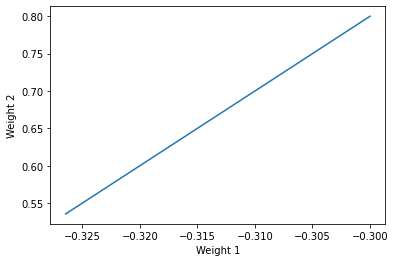

In [7]:
# How do the weights change with respect to the given input? Elaborate?

import matplotlib.pyplot as plt
plt.plot(weightlist1, weightlist2)
plt.xlabel('Weight 1')
plt.ylabel('Weight 2')
plt.show()

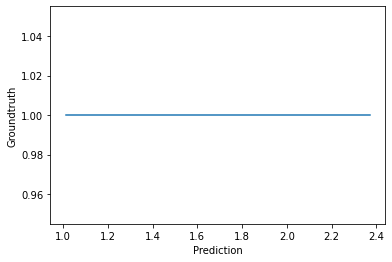

In [8]:
plt.plot(predictionlist, groundtruthlist)
plt.xlabel('Prediction')
plt.ylabel('Groundtruth')
plt.show()

# TensorFlow bring it on!
Now we are going to get our hands dirty with TensorFlow, where most of the hard work is already done for you. This way we can finally focus on "adding layers" and "going deeper".

## Optimization
First we concentrate on optimization, this is basically mirroring what we did with numpy a few cell above. This time we will implement a full neural network unit, including an activation function and also we are adding a third input, introducing a bias for the unit.

In [9]:
import tensorflow as tf
import numpy as np

# For reproducability
np.random.seed(2)

In [10]:
# Neural Network architecture
n_input = 3
n_output = 1
n_units = 1

# Training parameters
n_updates = 10


# Define graph / network
weights = {
    'h1': tf.Variable(np.reshape([np.float32(2.0), np.float32(2.0), np.float32(2.0)], (3, 1))),
    # 'h1': tf.Variable(tf.random_normal([n_input, n_units])),
}

biases = {
    'b1': tf.Variable(np.reshape([np.float32(4.0)], (1, 1))),
    # 'b1': tf.Variable(tf.random_normal([n_units])),
}

# This is where we design our unit
def unit(x0, weights, biases):
    # unit / neuron structure
    layer_1 = tf.add(tf.matmul(tf.cast(x0, tf.float32), weights['h1']), biases['b1'])
    # activation function
    y_pred = tf.nn.relu(layer_1)
    return y_pred


# Input
x = tf.Variable(np.reshape([1.0, 1.0, 3.0], (1, 3)))
# predicted output
y_pred = unit(x, weights, biases)
# Expected output
y_gt = tf.Variable(np.reshape([10.0], (1, 1)))

In [11]:
print(tf.__version__)

2.4.1


In [12]:
#Errors while running this and the next cell due to change in tensorflow verion

cost = tf.losses.mean_squared_error(y_gt, y_pred)

# 1. Stochastic gradient descent
#opt = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

# 2. Momentum optimizer
#opt = tf.train.MomentumOptimizer(learning_rate=0.0001, momentum=0.75)

# 3. Adaptive momentum optimizer
# opt = tf.train.AdamOptimizer(learning_rate=0.0001)

# 4. Adaptive momentum optimizer with adjusted initial learning rate
# opt = tf.train.AdamOptimizer(learning_rate=0.1)


train = opt.minimize(cost)

NameError: ignored

In [13]:
# Run graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(n_updates):
        sess.run(train)
        grad, variable = sess.run(opt.compute_gradients(cost))[0]

        print('Gradient', np.reshape(grad, 3))
        print('Weights:', np.reshape(sess.run(weights['h1']), 3))
        print('Biases:', sess.run(biases['b1']))
        print('Prediction', y_pred.eval())
        print('')

AttributeError: ignored

Try the different backpropagation approaches and see whether you can reproduce the findings presented in the lecture.

Notice the design of tensorflow, which first designs the model and then calls a session where the placeholders are filled and the forward and backward pass are executed.

## Regularization
Next we will get an intuition for regularization approaches (Evaluate the different designs 0. to 2.)  Also we are working with the Keras library, which is based on TensorFlow and introduces a more pythonic feeling. Do you have a notion why I would say so?

In [14]:
import tensorflow as tf

# Define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Design 0. without regularization:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),

  # Design 1. L2 Parameter norm penalty by kernel regularizer:
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  #tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),

  # Design 2. Dropout:
  # tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.5),
  # tf.keras.layers.Dense(512, activation=tf.nn.relu),
  # tf.keras.layers.Dropout(0.5),

  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [15]:
# Define training parameters, feel free to play with the different optimizers as well.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

In [16]:
# 3. Augmentation
# x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
# datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
#                                                                 featurewise_center=True,
#                                                                 featurewise_std_normalization=True,
#                                                                 rotation_range=20,
#                                                                 width_shift_range=0.2,
#                                                                 height_shift_range=0.2,
#                                                                 horizontal_flip=False
#                                                                 )
#
# for e in range(10):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagenerator.flow(x_train, y_train, batch_size=32):
#         model.fit(np.reshape(x_batch, (-1, 28, 28)), y_batch, shuffle=True)
#         batches += 1
#         if batches >= len(x_train) / 32:
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break

# 4. Early stopping (usually you should monitor the validation accuracy)
# es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
#                                      min_delta=0,
#                                      patience=1,
#                                      mode='auto'
#                                      )
#
# Fit model on training data (with callback)
# model.fit(x_train, 
#          y_train, 
#          epochs=10, 
#          shuffle=True, 
#          callbacks=[es],
#          validation_data=(x_validation, y_validation)
#         )

# Fit model on training data (without regularization)
model.fit(x_train, y_train, epochs=10, shuffle=True)

# Evaluate performance on validation set
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3436 - accuracy: 0.8941
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1049 - accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0731 - accuracy: 0.9782
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0516 - accuracy: 0.9854
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0390 - accuracy: 0.9889
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0373 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9903
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0304 - accuracy: 0.9916
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1225 

## Next steps to take it from here

- Keep in mind that [MNIST](http://yann.lecun.com/exdb/mnist/) is the "Hello world" of machine learning, this is the go-to-dataset if you are in need for a toy problem. Most new ideas in machine learning are presented by the aid of MNIST, make sure that you familiarize yourself with the dataset and its characteristics.
- Try different regularization approaches and their influence.
- Can you think of a good task to introduce Convolutional Neural Networks, including receptive field, strides, semantic information, and so on? (Send your jupyter notebook to mark.schutera@kit.edu for a chance to earn bonus points).


In [21]:
#L2 parameter norm penalties:

# Define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Define training parameters, SGD optimizer.
model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

# Fit model on training data (without regularization)
model.fit(x_train, y_train, epochs=10, shuffle=True)

# Evaluate performance on validation set
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)


Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 19.3368 - accuracy: 0.7125
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 9.1685 - accuracy: 0.9109
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.6777 - accuracy: 0.9218
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5463 - accuracy: 0.9295
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5305 - accuracy: 0.9331
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0409 - accuracy: 0.9354
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7919 - accuracy: 0.9417
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6678 - accuracy: 0.9458
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6041 - accuracy: 0.9461
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.5463

In [22]:
#Drop out 0.5

# Define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Design 2. Dropout:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Define training parameters, RMSprop optimizer.
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

# Fit model on training data (without regularization)
model.fit(x_train, y_train, epochs=10, shuffle=True)

# Evaluate performance on validation set
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7365 - accuracy: 0.7669
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3777 - accuracy: 0.9259
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4341 - accuracy: 0.9289
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5134 - accuracy: 0.9247
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6157 - accuracy: 0.9197
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7214 - accuracy: 0.9193
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8008 - accuracy: 0.9121
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9129 - accuracy: 0.9037
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9201 - accuracy: 0.9001
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3570 

In [18]:
#Augmentation only 2 epochs
# Define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Design 0. without regularization:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Define training parameters, feel free to play with the different optimizers as well.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

# 3. Augmentation
x_train = x_train.reshape(x_train.shape[0], 1, 28, 28)
datagenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                                                                featurewise_center=True,
                                                                featurewise_std_normalization=True,
                                                                rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=False
                                                                )
for e in range(2):
    print('Epoch', e)
    batches = 0
    for x_batch, y_batch in datagenerator.flow(x_train, y_train, batch_size=32):
        model.fit(np.reshape(x_batch, (-1, 28, 28)), y_batch, shuffle=True)
        batches += 1
        print(batches)
        if batches >= len(x_train) / 32:
            # we need to break the loop by hand because
            # the generator loops indefinitely
            break

# Evaluate performance on validation set
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)

Epoch 0


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/numpy_array_iterator.py:136: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  str(self.x.shape[channels_axis]) + ' channels).')
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator speci

Streaming output truncated to the last 5000 lines.
1252
1/1 [==============================] - 0s 4ms/step - loss: 0.2509 - accuracy: 0.9062
1253
1/1 [==============================] - 0s 4ms/step - loss: 0.1643 - accuracy: 0.9375
1254
1/1 [==============================] - 0s 4ms/step - loss: 0.6973 - accuracy: 0.8438
1255
1/1 [==============================] - 0s 4ms/step - loss: 0.1651 - accuracy: 0.9375
1256
1/1 [==============================] - 0s 4ms/step - loss: 0.2685 - accuracy: 0.9375
1257
1/1 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 0.9375
1258
1/1 [==============================] - 0s 4ms/step - loss: 0.2396 - accuracy: 0.9062
1259
1/1 [==============================] - 0s 4ms/step - loss: 0.4479 - accuracy: 0.9062
1260
1/1 [==============================] - 0s 4ms/step - loss: 0.2498 - accuracy: 0.9375
1261
1/1 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.8438
1262
1/1 [==============================] - 0s 4m

In [19]:
#Early Stopping

# Define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Design 1. L2 Parameter norm penalty by kernel regularizer:
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Define training parameters, feel free to play with the different optimizers as well.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

# 4. Early stopping (usually you should monitor the validation accuracy)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      min_delta=0,
                                      patience=1,
                                      mode='auto'
                                      )

# Fit model on training data (with callback)
model.fit(x_train, 
          y_train, 
          epochs=15, 
          shuffle=True, 
          callbacks=[es],
          validation_data=(x_validation, y_validation)
         )

# Evaluate performance on validation set
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)


Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.8984 - accuracy: 0.8446 - val_loss: 0.6312 - val_accuracy: 0.9236
Epoch 2/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6144 - accuracy: 0.9258 - val_loss: 0.5308 - val_accuracy: 0.9332
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5290 - accuracy: 0.9345 - val_loss: 0.4839 - val_accuracy: 0.9413
Epoch 4/15
313/313 [==============================] - 1s 2ms/step - loss: 0.5050 - accuracy: 0.9232
validation accuracy: 0.9232000112533569


In [20]:
# Define model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),

  # Design 0. without regularization:
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Define training parameters, feel free to play with the different optimizers as well.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training data (reduce training data to 10k samples)
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

# Normalize input images (comply with activation function)
x_train, x_validation = x_train / 255.0, x_validation / 255.0

# 4. Early stopping (usually you should monitor the validation accuracy)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      min_delta=0,
                                      patience=1,
                                      mode='auto'
                                      )

# Fit model on training data (with callback)
model.fit(x_train, 
          y_train, 
          epochs=15, 
          shuffle=True, 
          callbacks=[es],
          validation_data=(x_validation, y_validation)
         )

# Evaluate performance on validation set
_, validation_acc = model.evaluate(x_validation, y_validation)
print('validation accuracy:', validation_acc)


Epoch 1/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3507 - accuracy: 0.8917 - val_loss: 0.1439 - val_accuracy: 0.9579
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1048 - accuracy: 0.9704 - val_loss: 0.1116 - val_accuracy: 0.9685
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9785 - val_loss: 0.0893 - val_accuracy: 0.9778
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0552 - accuracy: 0.9843 - val_loss: 0.0849 - val_accuracy: 0.9793
Epoch 5/15
313/313 [==============================] - 1s 2ms/step - loss: 0.0992 - accuracy: 0.9768
validation accuracy: 0.9768000245094299


**We can use CNN's for object recognition/object detection where we can implement all the methods mentioned.**


